# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Outliers
</p>

<img src="https://learn.g2.com/hubfs/Imported%20sitepage%20images/1ZB5giUShe0gw9a6L69qAgsd7wKTQ60ZRoJC5Xq3BIXS517sL6i6mnkAN9khqnaIGzE6FASAusRr7w=w1439-h786.png">





   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. Data Overview](#3)

* [4. EDA](#4)
        
<!-- * [5. Preprocessing](#5) 
 -->
* [5. SPLITING DATA](#6) 

<!-- * [7. Scaling](#7) 
    -->
* [6. MODELS](#8)

<!-- * [9. SUMMRY](#9)
  -->
* [7. END](#10)
    
    

<a id="1"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [14]:
pip install pyod

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from pyod.models import abod
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn import metrics

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Set style of seaborn plots
sns.set_style('darkgrid')

# Palette
palette = sns.color_palette('plasma')

#warning
import warnings 
warnings.filterwarnings('ignore')

<a id="2"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [3]:
df = pd.read_csv('/kaggle/input/imbalance/train.csv')

<a id="3"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🧐 Data Overview</p>

In [4]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
np.unique(df['target'], return_counts=True)

(array([0, 1]), array([573518,  21694]))

In [6]:
21694/573518

0.037826188541597645

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [8]:
df.isnull().any()

id                False
target            False
ps_ind_01         False
ps_ind_02_cat     False
ps_ind_03         False
ps_ind_04_cat     False
ps_ind_05_cat     False
ps_ind_06_bin     False
ps_ind_07_bin     False
ps_ind_08_bin     False
ps_ind_09_bin     False
ps_ind_10_bin     False
ps_ind_11_bin     False
ps_ind_12_bin     False
ps_ind_13_bin     False
ps_ind_14         False
ps_ind_15         False
ps_ind_16_bin     False
ps_ind_17_bin     False
ps_ind_18_bin     False
ps_reg_01         False
ps_reg_02         False
ps_reg_03         False
ps_car_01_cat     False
ps_car_02_cat     False
ps_car_03_cat     False
ps_car_04_cat     False
ps_car_05_cat     False
ps_car_06_cat     False
ps_car_07_cat     False
ps_car_08_cat     False
ps_car_09_cat     False
ps_car_10_cat     False
ps_car_11_cat     False
ps_car_11         False
ps_car_12         False
ps_car_13         False
ps_car_14         False
ps_car_15         False
ps_calc_01        False
ps_calc_02        False
ps_calc_03      

In [9]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


<div class="alert alert-block alert-info ;"> 📌  We do not have any null or missing data 🥳 </div>

In [10]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Markdown
<a id="4"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 EDA</p>


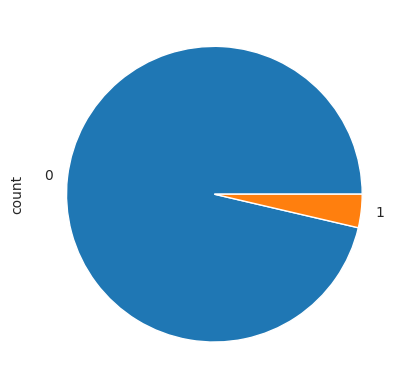

In [11]:
df['target'].value_counts().plot(kind='pie');

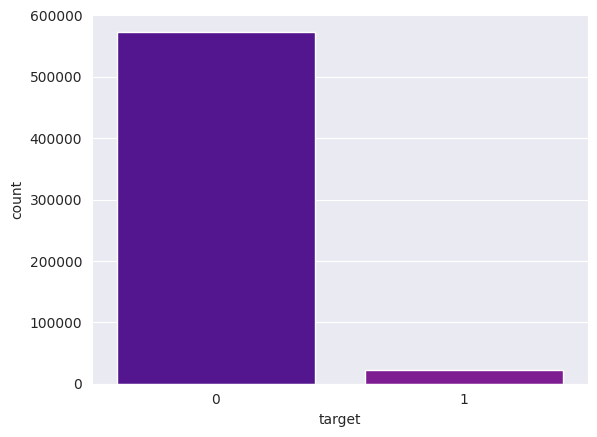

In [12]:
sns.countplot(data = df , x='target' , palette=palette);

<a id="6"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">✂️ SPLITING DATA</p>

In [13]:
sampled_df = df.sample(frac=0.2, random_state=42)

X = sampled_df.drop(['target', 'id'], axis=1)
y = sampled_df['target']


<a id="8"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💡 MODELS</p>


## abod

In [15]:
abod_od = abod.ABOD(n_neighbors=20, contamination=0.03)

In [16]:
y_pred = abod_od.fit_predict(X)

In [17]:
print(metrics.classification_report(y_true=y, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    114657
           1       0.06      0.05      0.05      4385

    accuracy                           0.94    119042
   macro avg       0.51      0.51      0.51    119042
weighted avg       0.93      0.94      0.93    119042



## IsolationForest

In [18]:
IF = IsolationForest(contamination=0.005)
y_pred = IF.fit_predict(X)

In [19]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([   596, 118446]))

In [20]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [21]:
print(metrics.classification_report(y_true=y, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114657
           1       0.11      0.01      0.03      4385

    accuracy                           0.96    119042
   macro avg       0.54      0.51      0.50    119042
weighted avg       0.93      0.96      0.94    119042



## LocalOutlierFactor

In [22]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03, n_jobs=-1)

In [23]:
y_pred = lof.fit_predict(X)

In [24]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([  3572, 115470]))

In [25]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [26]:
print(metrics.classification_report(y_true=y, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    114657
           1       0.06      0.04      0.05      4385

    accuracy                           0.94    119042
   macro avg       0.51      0.51      0.51    119042
weighted avg       0.93      0.94      0.93    119042



<a id="10"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">👋 END </p>

<p style="font-family:newtimeroman;color:clack;font-size:150%;text-align:center;border-radius:10px 10px;">I hope this netbook is useful for you. I am waiting for your support in the comments. I love you all 🤍🌱 </p>